# Import Libraries and Data

In [58]:
# -*- coding: utf-8 -*-
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')  #ignore warning msg

#Pandas Config.
#For the default setting: reset_option(param) 
pd.set_option("display.max_rows", 100)  #출력할 행의 수
pd.set_option('display.max_columns', None)  #출력할 열의 수; None for the entire columns
pd.set_option('display.max_colwidth', 1000)  #열의 너비; None for the entire columns
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format scientific notation from Pandas

%matplotlib inline

In [71]:
path = "../data/raw/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
# y_train = train.SalePrice.values
# y_test = test.SalePrice.values
train.columns = [i.lower() for i in train.columns]
test.columns = [i.lower() for i in test.columns]

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['saleprice'], axis=1, inplace=True)


In [72]:
print(data.shape)

(2919, 80)


In [73]:
data.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Device Setting


In [74]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


# EDA

## What are the key predictors?
- OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available)
- YearBuilt
- TotalBsmtSF
- GrLivArea

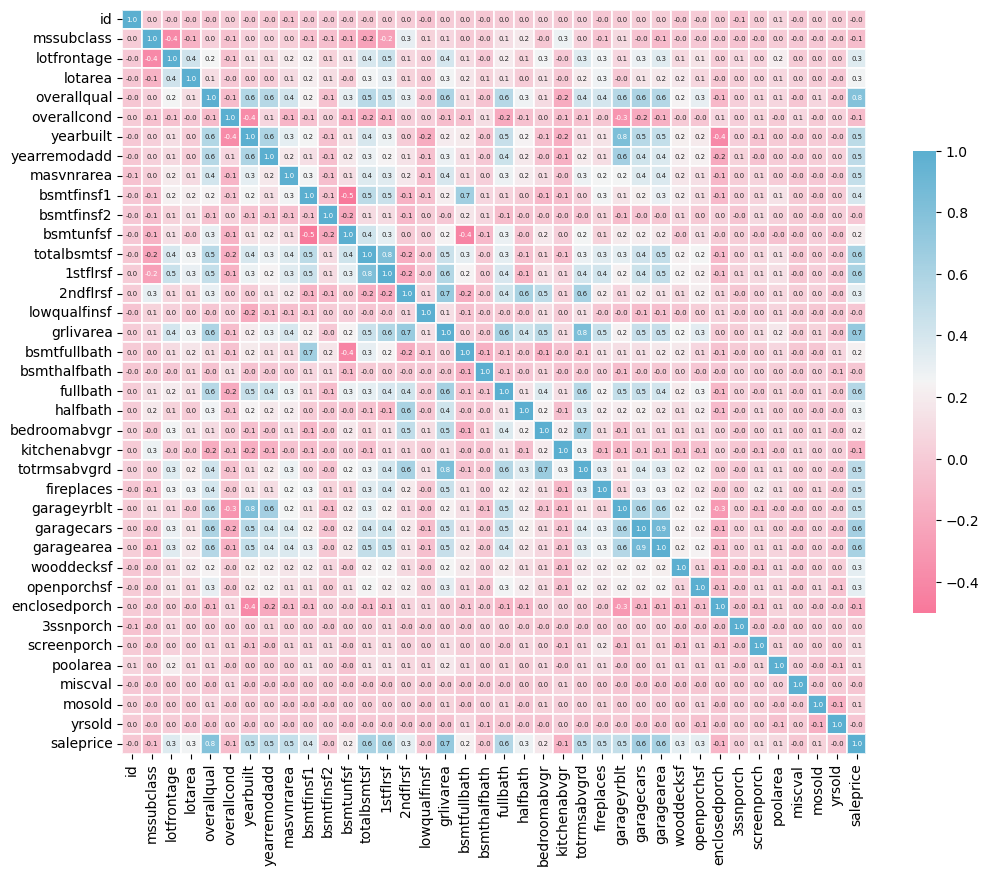

In [78]:
# Heatmap

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

plt.subplots(figsize=(12,12))
cormat = train[train.dtypes[train.dtypes != "object"].index].corr()
sns.heatmap(cormat.round(2),
            # cmap="Greys_r", #"OrRd_r", #"Greys_r", #"BuPu_r", #"Blues_r",
            cmap=cmap,
            linewidths=.1,            
            alpha=.8,
            square=True,
            annot=True,
            annot_kws={'size': 5},
            fmt=".1f",
            # cbar=False,
            cbar_kws={"shrink": .5},           
);


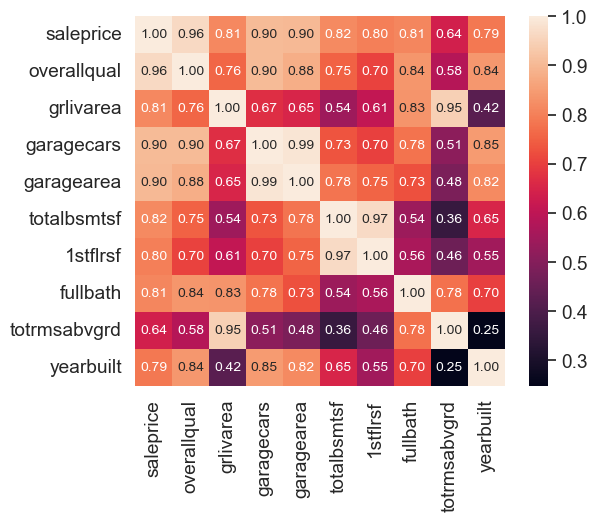

In [80]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = cormat.nlargest(k, 'saleprice')['saleprice'].index
cm = np.corrcoef(cormat[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

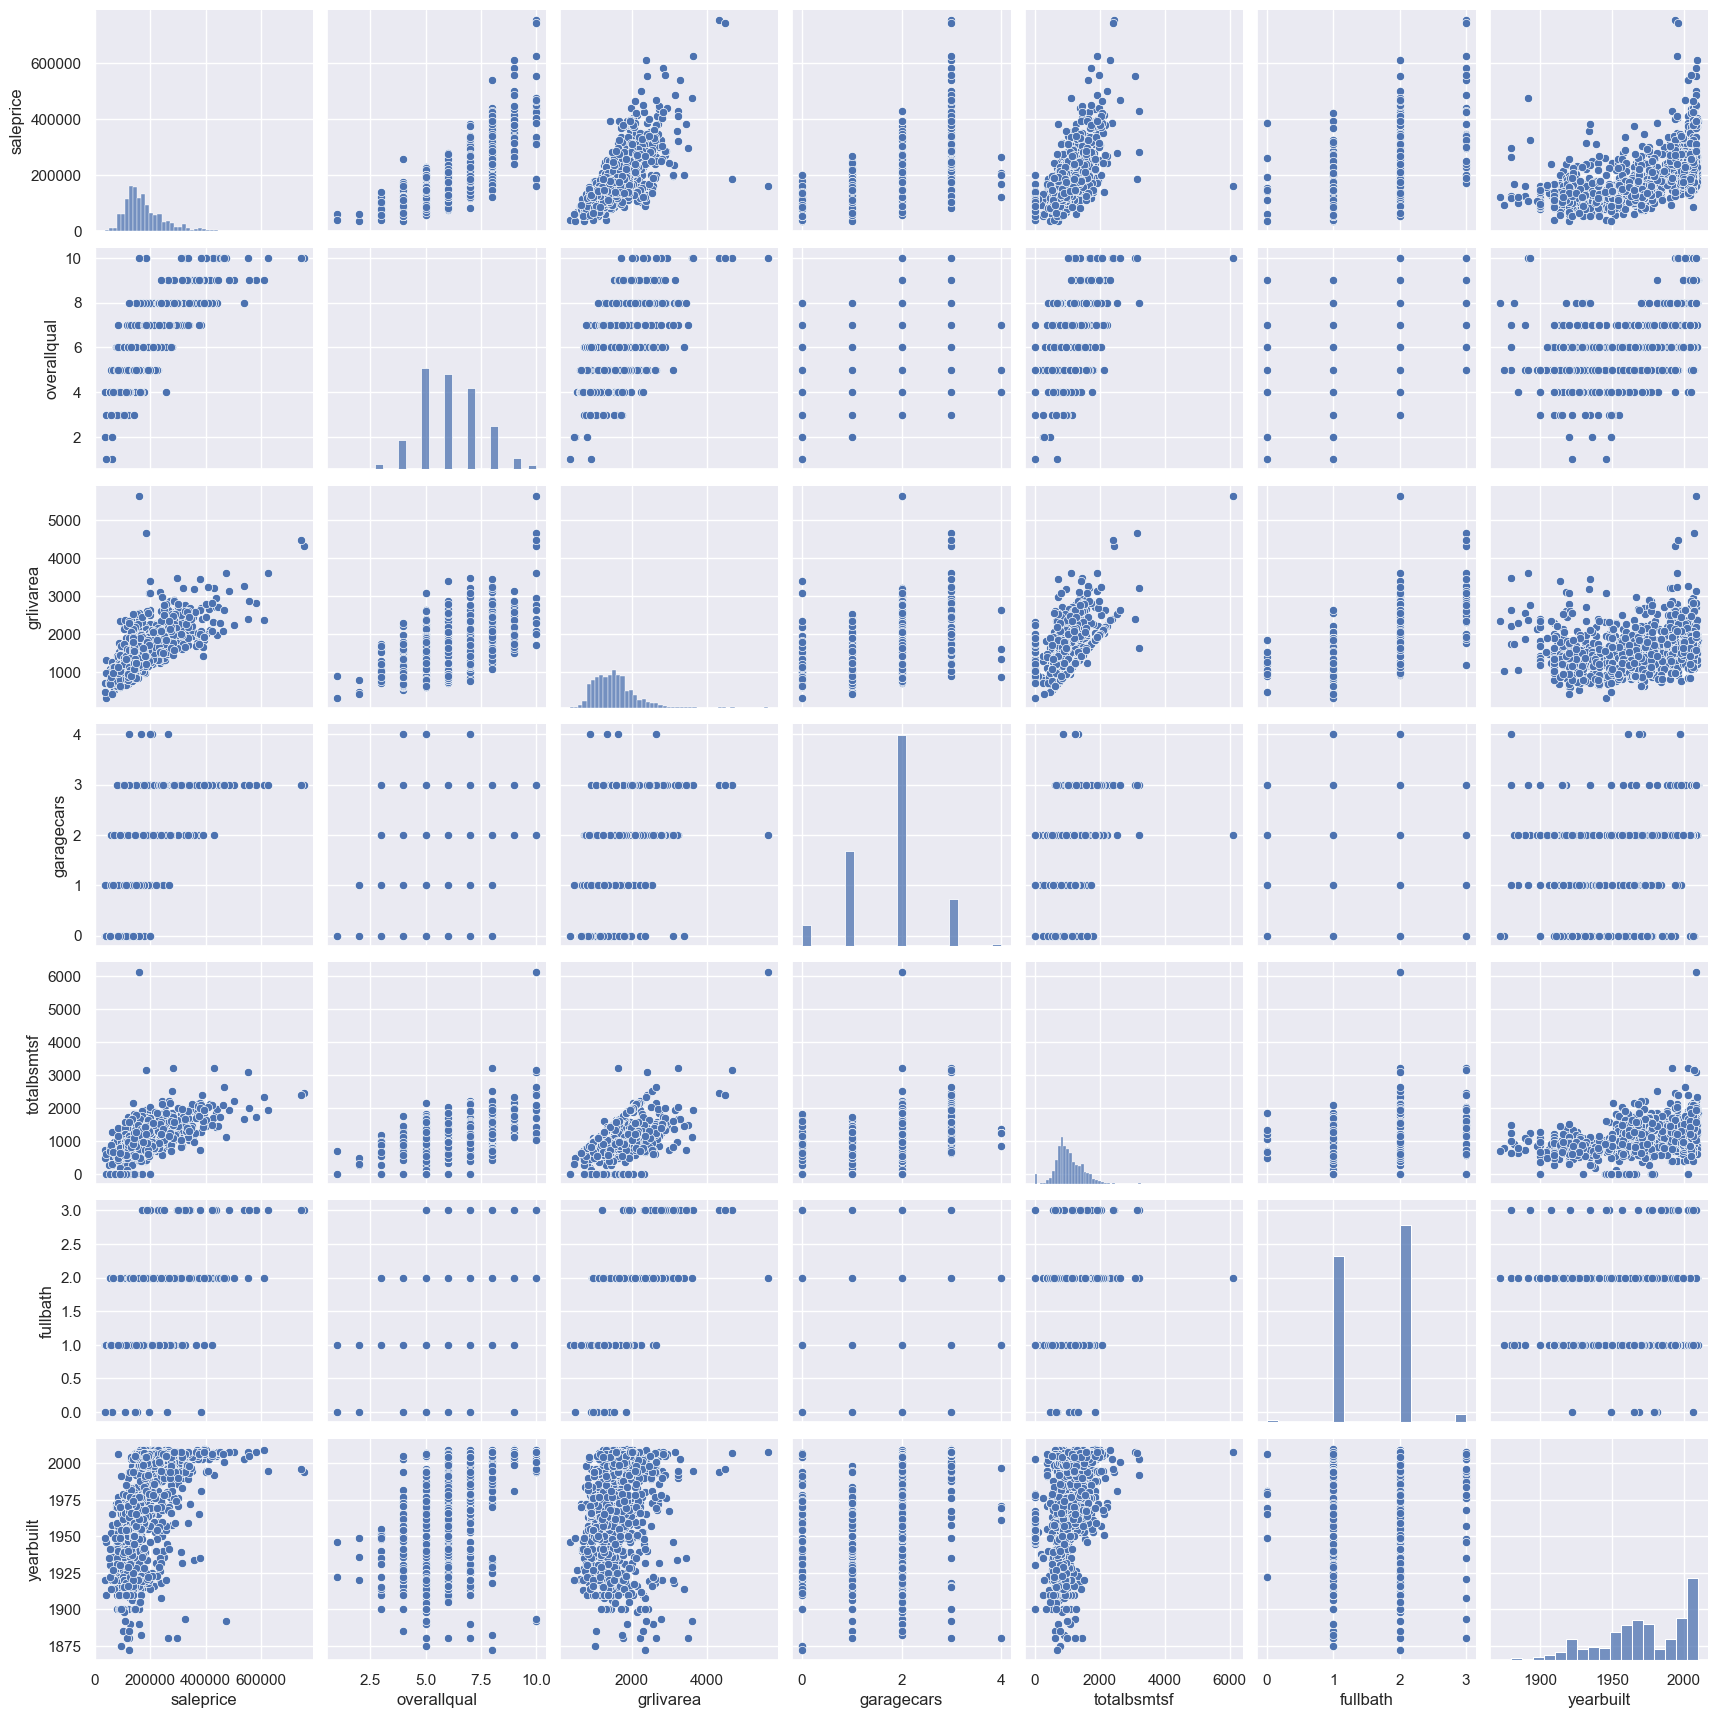

In [82]:
#scatterplot
sns.set()
cols = ['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'fullbath', 'yearbuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Handle Missing Values
- https://www.kaggle.com/code/dansbecker/handling-missing-values

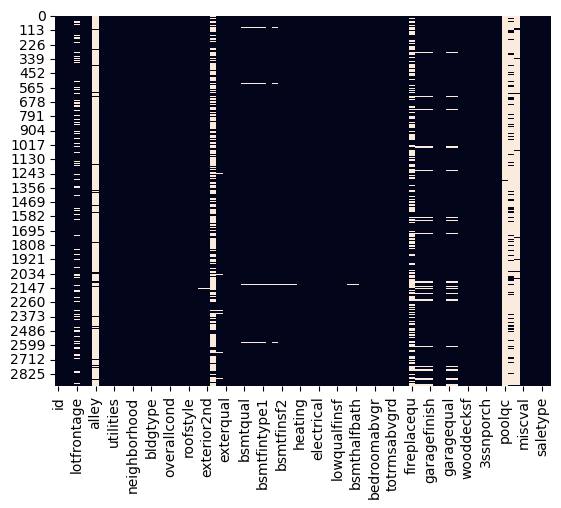

In [68]:
# data[data.isna().any(axis=1)]
sns.heatmap(data.isnull(), cbar=False);

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
# Dropping 

In [ ]:
# Imputation

# Handle Outliers 
- https://www.kaggle.com/code/masumrumi/a-detailed-regression-guide-with-house-pricing

In [6]:
data["saleprice"].describe(percentiles=np.arange(0.05, 1, 0.05))

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
15%     115000.000
20%     124000.000
25%     129975.000
30%     135500.000
35%     141000.000
40%     147000.000
45%     155000.000
50%     163000.000
55%     172500.000
60%     179280.000
65%     187500.000
70%     198620.000
75%     214000.000
80%     230000.000
85%     250000.000
90%     278000.000
95%     326100.000
max     755000.000
Name: saleprice, dtype: float64

In [7]:
# IQR method to handle outliers
Q1 = data["saleprice"].quantile(0.25)
Q3 = data["saleprice"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR


new_data = data[~((data["saleprice"] < (lower_thresh)) |(data["saleprice"] > (upper_thresh)))]
print(data.shape, new_data.shape)


(1460, 81) (1399, 81)


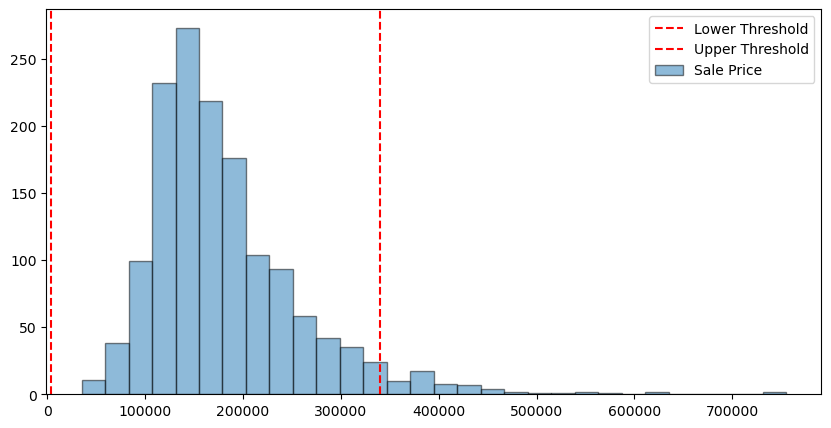

In [8]:
plt.figure(figsize=(10, 5))

plt.hist(data["saleprice"], bins=30, edgecolor='black', alpha=0.5)
plt.axvline(x=lower_thresh, color='r', linestyle='--')
plt.axvline(x=upper_thresh, color='r', linestyle='--')
plt.legend(['Lower Threshold', 'Upper Threshold', 'Sale Price'])

plt.show()

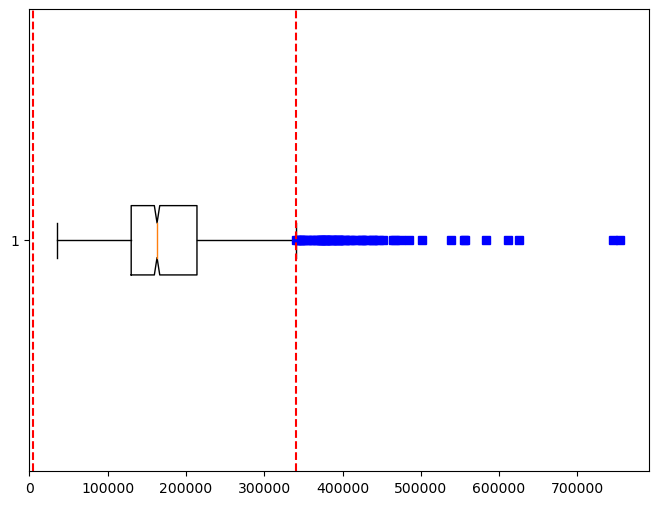

In [9]:
plt.figure(figsize=(8, 6))

plt.boxplot(data["saleprice"],            
            notch=1, # if 'True' then notched box plot
            sym='bs', # symbol: red square
            vert=0, # vertical box aligmnent
            )

plt.axvline(x=lower_thresh, color='r', linestyle='--')
plt.axvline(x=upper_thresh, color='r', linestyle='--')

plt.show()


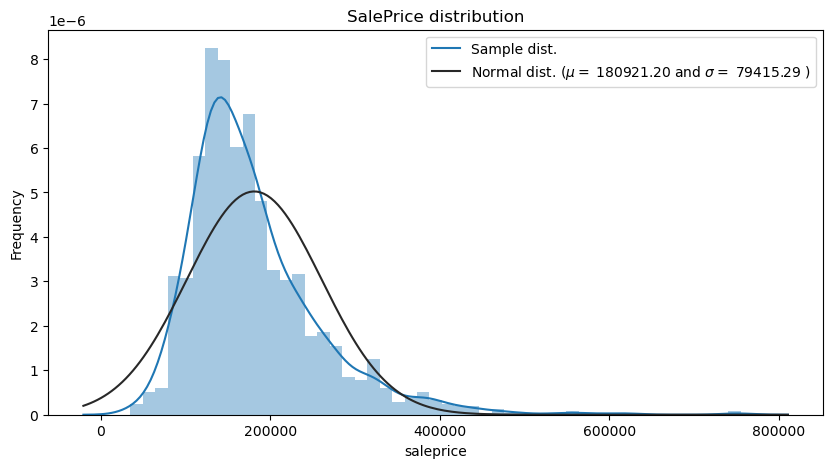

In [10]:
plt.figure(figsize=(10, 5))

(mu, sigma) = norm.fit(data['saleprice'])

sns.distplot(data['saleprice'] , fit=norm)
plt.legend(['Sample dist.', 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()



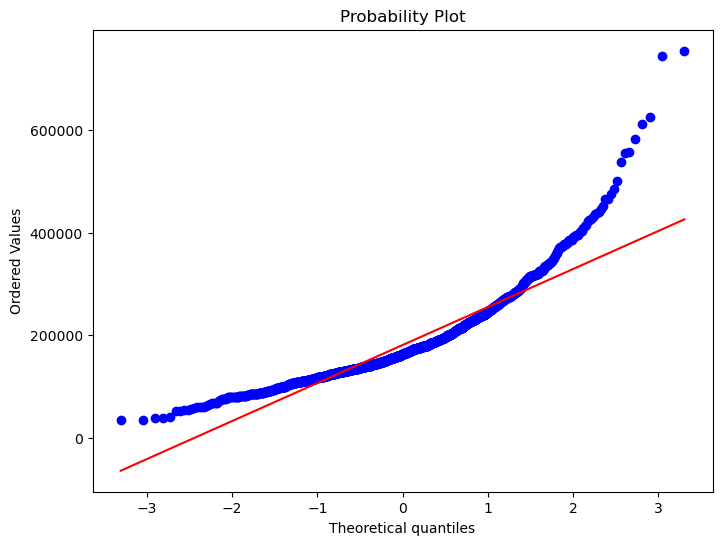

In [59]:
plt.figure(figsize=(8, 6))

stats.probplot(data["saleprice"], plot=plt)

plt.show()

- Sample values are starting at certain level around 30k and there seems to be right-skewed.
- If we're going to implement linear models, we need to transform the variable into more normally distributed one.

## Data Transformation
- Find skewed variables
- Implement Data Transformation

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [19]:
## Import necessary modules 
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

data["bcx_saleprice"] = boxcox1p(data["saleprice"], boxcox_normmax(data["saleprice"] + 1))

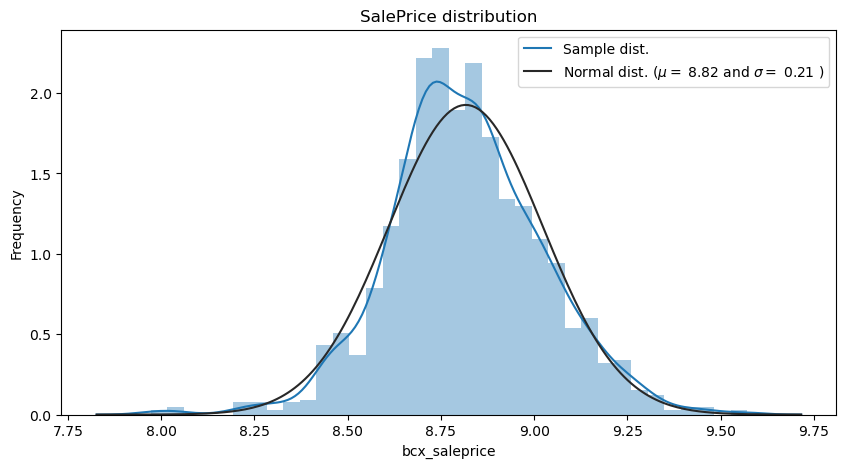

In [20]:
plt.figure(figsize=(10, 5))

(mu, sigma) = norm.fit(data['bcx_saleprice'])

sns.distplot(data['bcx_saleprice'] , fit=norm)
plt.legend(['Sample dist.', 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()



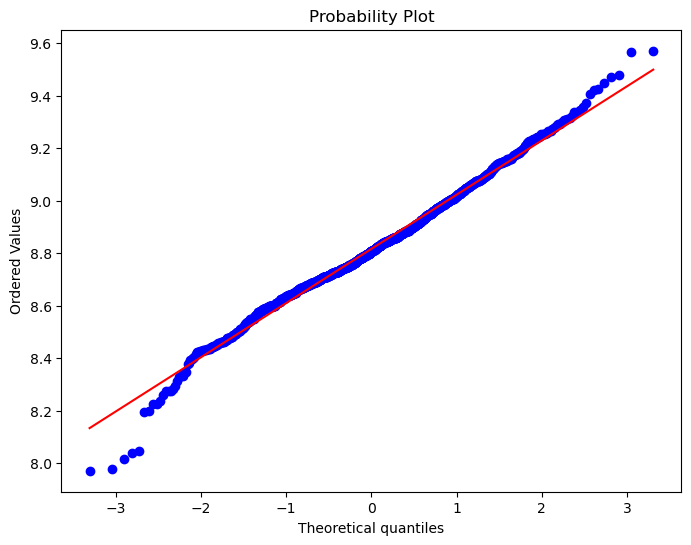

In [21]:
plt.figure(figsize=(8, 6))

stats.probplot(data["bcx_saleprice"], plot=plt)

plt.show()

In [11]:
data["log_saleprice"] = np.log1p(data["saleprice"])

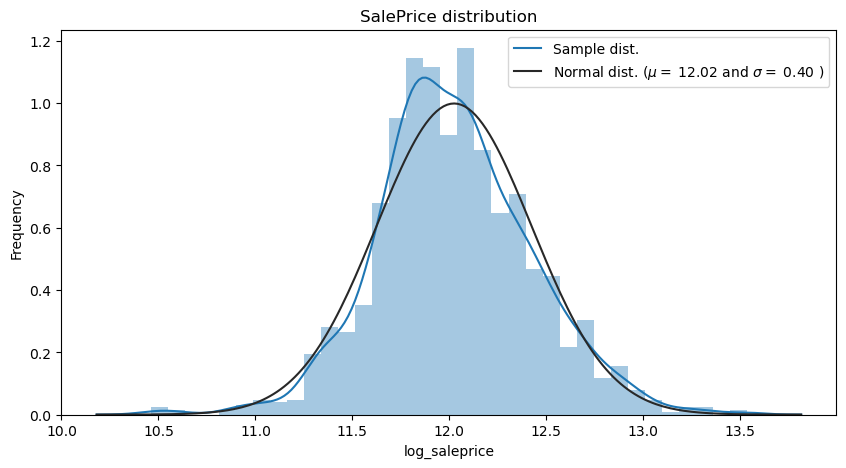

In [14]:
plt.figure(figsize=(10, 5))

(mu, sigma) = norm.fit(data['log_saleprice'])

sns.distplot(data['log_saleprice'] , fit=norm)
plt.legend(['Sample dist.', 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()



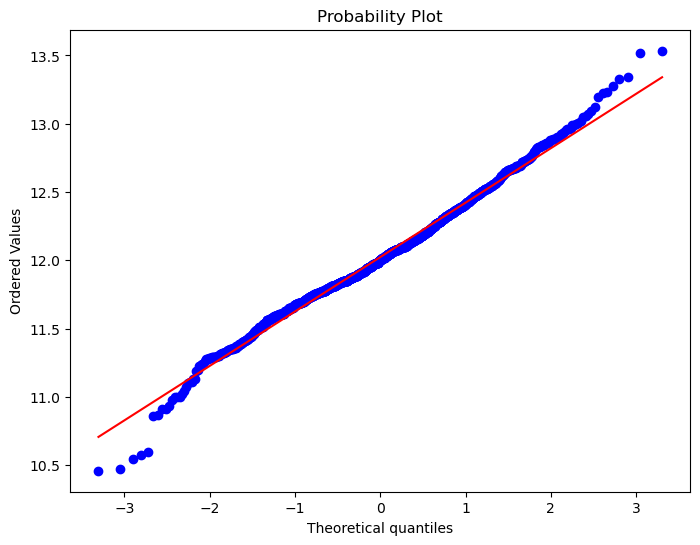

In [13]:
plt.figure(figsize=(8, 6))

stats.probplot(data["log_saleprice"], plot=plt)

plt.show()

In [26]:
skew(data["saleprice"]), skew(data["bcx_saleprice"]), skew(data["log_saleprice"])

(1.880940746034036, 0.029469016443659627, 0.12122191311528363)

# Modeling
- https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

In [ ]:
# XGBRegressor(tree_method='gpu_hist', gpu_id=0)
# LGBMRegressor(device='gpu')

<!-- XGBRegressor(tree_method='gpu_hist', gpu_id=0) -->